In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import pylab    
import scipy.stats as stats
import math

from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv("data/Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data.info

<bound method DataFrame.info of       Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      S

In [5]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


C:\Users\Bartol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


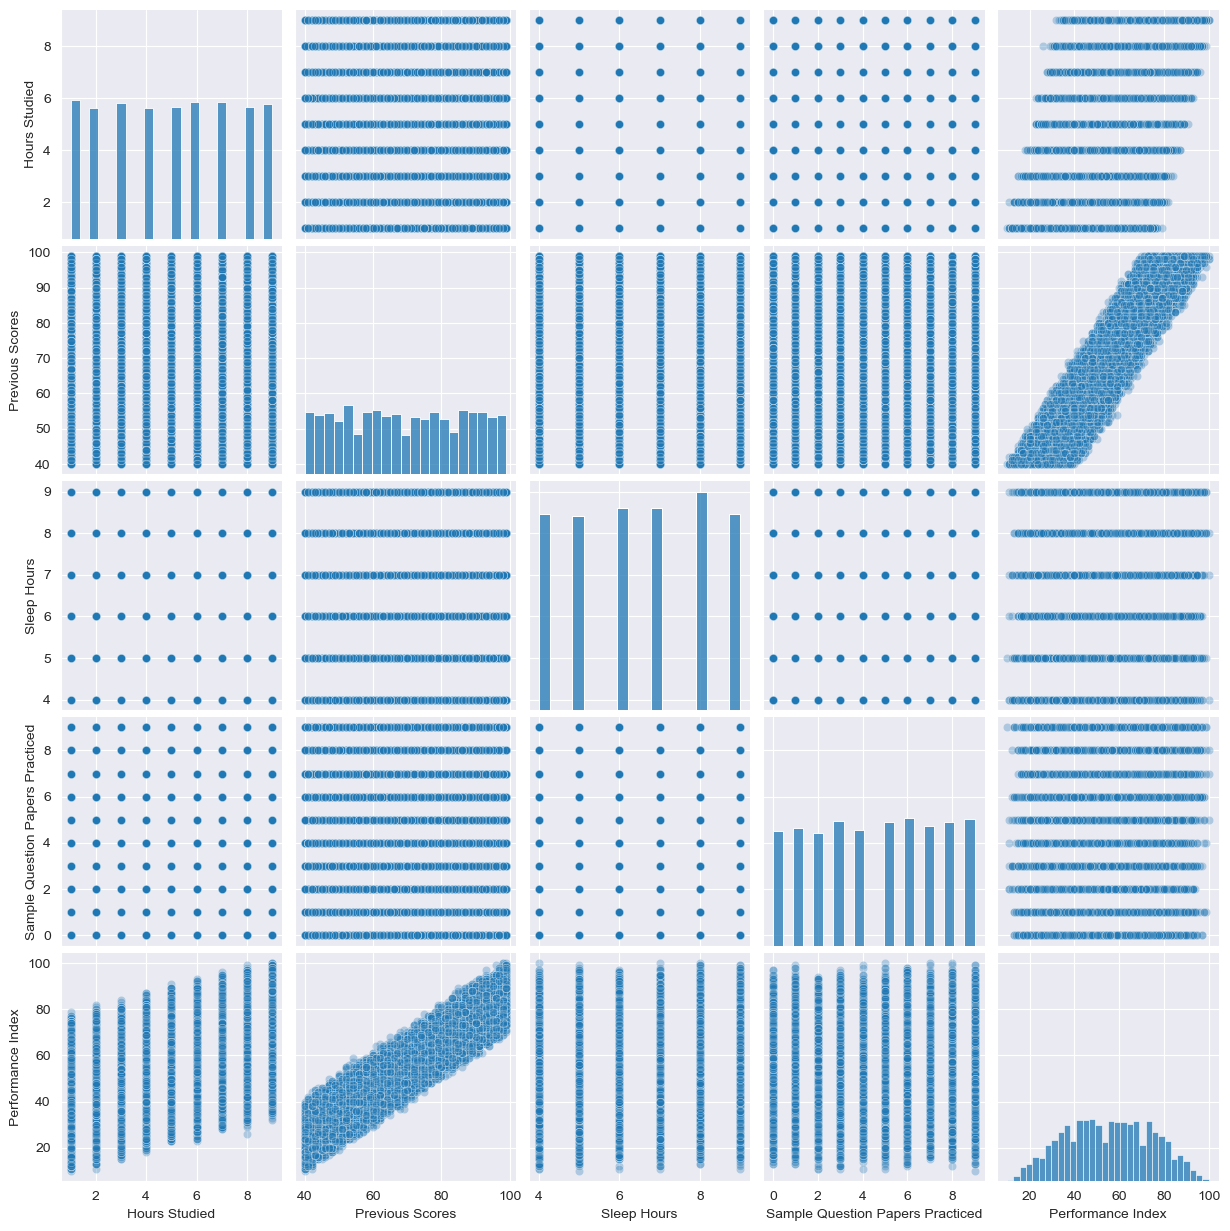

In [6]:
sns.pairplot(data, kind='scatter', plot_kws={'alpha': 0.3})

C:\Users\Bartol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


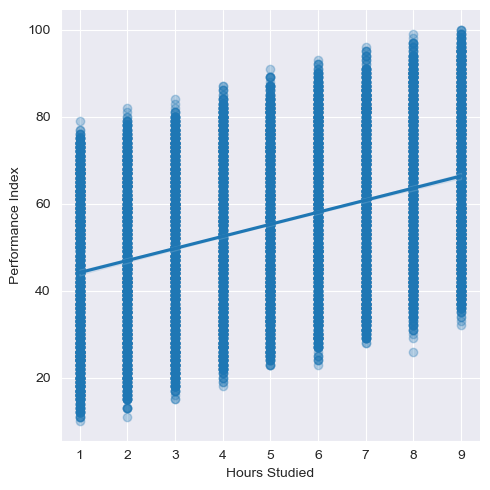

In [7]:
sns.lmplot(x="Hours Studied", y='Performance Index', data=data,scatter_kws={'alpha':0.3})

C:\Users\Bartol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


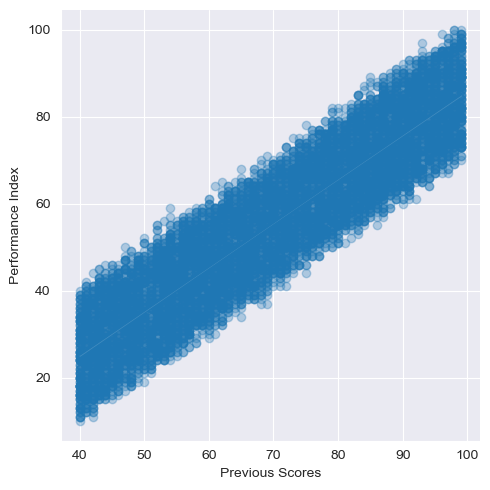

In [10]:
sns.lmplot(x='Previous Scores', y='Performance Index', data=data,scatter_kws={'alpha':0.3})


In [11]:
predictors = data[['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced']]
target = data['Performance Index']

In [12]:
predictors_train, predictors_test, target_train,target_test = train_test_split(predictors,target,test_size=0.3, random_state=42)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(predictors_train,target_train)

LinearRegression()

In [15]:
prediction = lr.predict(predictors_test)

In [16]:
prediction

array([54.33584278, 23.52069505, 47.42234857, ..., 33.38187544,
       66.4484969 , 31.16493022])

<Axes: ylabel='Performance Index'>

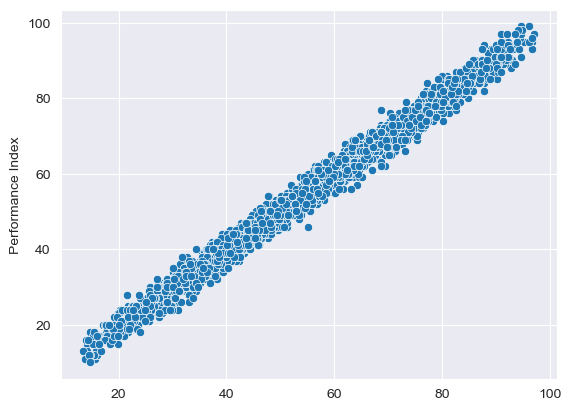

In [17]:
sns.scatterplot(x=prediction, y=target_test)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("MAE: " ,mean_absolute_error(target_test,prediction))
print("MSE: " ,mean_squared_error(target_test,prediction))
print("RSME: " ,math.sqrt(mean_squared_error(target_test,prediction)))

MAE:  1.73506400356859
MSE:  4.833797434400208
RSME:  2.19858987407843


C:\Users\Bartol\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


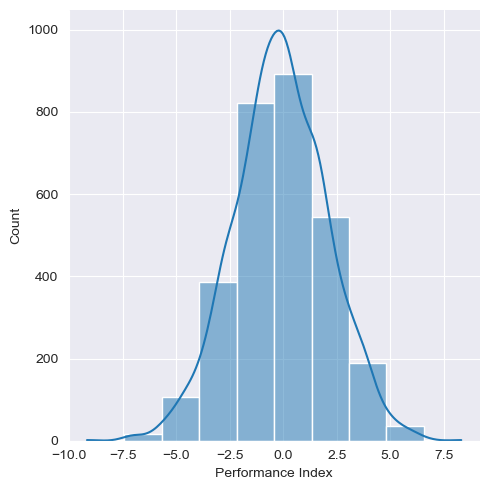

In [19]:
sns.displot(target_test-prediction,bins=10,kde=True)

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([-9.17043822, -7.38006138, -7.13172763, ...,  6.51097844,
          6.85975769,  8.31843618])),
 (2.1973626734708307, -0.10834526481404118, 0.9996041310874416))

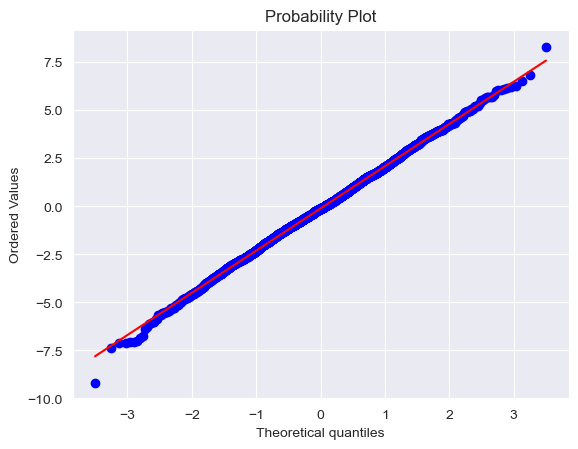

In [20]:
stats.probplot(target_test-prediction,dist='norm',plot=pylab)